# Table of Contents 
1. [Exploratory Analysis](#Exploratory-analysis)
 1. [MLR Models](#choosing-which-mlr-models-would-be-best)
     1. [Split Models into Train/Test](#Put-Into-Test-and-Training-Sets-for-More-Accuracy)
 2. [RDF Models](#rdf-analysis)
     1. [Model 1 (All Variables)](#Model-1-=-all-variables-used)
     2. [Model 2 (Top 3)](#model-2-=-top-3-crude,-corn,-coal)
     3. [Model 3 (Top 4)](#model-3-=-top-4-crude,-corn,-coal,-gas)
     4. [Model 4 (No Crude)](#Model-4-=-no-crude-since-highly-correlated-to-coal-to-I-will-use-coal)
     5. [Model 5 (no x variabels correlated to each other)](#Model-5-=-x-variables-not-correlated-to-each-other,-coal,-gas,-uan-inventory)
2. [Average Case](#Average-case)
 1. [MLR Models](#mlr-models-avg)
 2. [RDF Models](#rdf-models)
 3. [Predictions Part](#predictions-part)
3. [Best Case](#Best-case)
 1. [MLR Models](#mlr-models-best)
 2. [RDF Models](#rdf-models-best)
 3. [Predictions Part](#predictions-part-best)
4. [Worst Case](#Worst-case)
 1. [MLR Models](#mlr-models-worst)
 2. [RDF Models](#rdf-models-worst)
 3. [Predictions Part](#predictions-part-worst)

# Exploratory Analysis
[Top](#table-of-contents)

In [19]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [2]:
#1/5/1996 - 6/24/2016
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','My_Coal','Urea_Inventory','Urea','UAN_Inventory','UAN']][0:1069]
df_96on.tail(2)

,Date,Dollar,Crude,Corn,Gas,My_Coal,Urea_Inventory,Urea,UAN_Inventory,UAN
1067,6/17/2016,94.21,48.56,442.75,2.67,52.55,371191.0,185.0,1048312.0,169.92
1068,6/24/2016,95.45,48.31,389.00,2.69,52.90,371191.0,182.0,1048312.0,165.12


## Before Proceeding Please Go To Forward Selection MLR Model
[Click Here to Get to Forward Selection](#forward-selection)

In [5]:
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
Gas                      float64
My_Coal                  float64
Urea_Inventory           float64
Urea                     float64
UAN_Inventory            float64
UAN                      float64
dtype: object

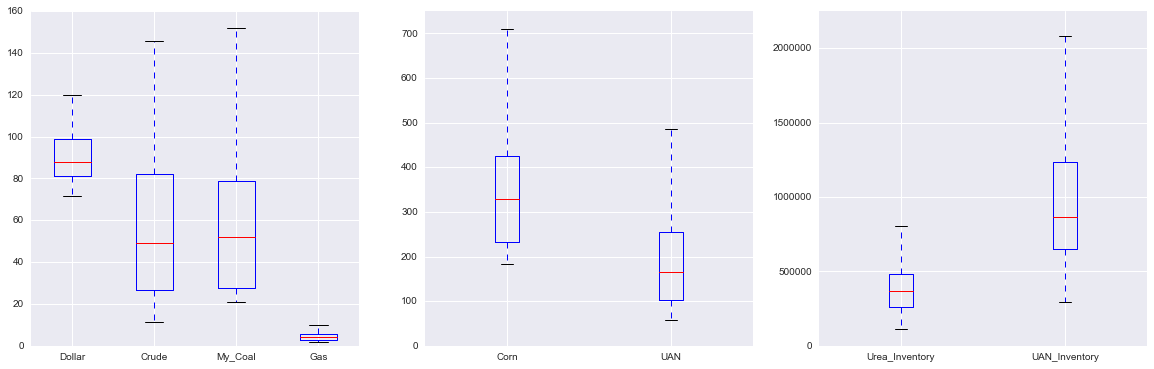

In [6]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
x1 = df_96on[['Dollar']]
x2 = df_96on[['Crude']]
x3 = df_96on[['Corn']]
x4 = df_96on[['My_Coal']]
x5 = df_96on[['Gas']]
x6 = df_96on[['Urea_Inventory']]
x7 = df_96on[['UAN_Inventory']]
x8 = df_96on[['UAN']]
ax1.boxplot([x1,x2,x4,x5])
ax1.set_xticklabels(['Dollar','Crude','My_Coal','Gas'])
ax1.set_ylim([0,160])
ax2.boxplot([x3,x8])
ax2.set_xticklabels(['Corn','UAN'])
ax2.set_ylim([0,750])
ax3.boxplot([x6,x7])
ax3.set_xticklabels(['Urea_Inventory','UAN_Inventory'])
ax3.set_ylim([0,2250000])
plt.show()

In [7]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,My_Coal,Urea_Inventory,Urea,UAN_Inventory,UAN
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1.069000e+03,1069.000000
mean,90.700949,54.744191,362.061272,4.584039,58.229139,380087.337519,259.563143,1.005712e+06,183.682245
std,11.671409,31.145360,156.191066,2.363132,33.461555,151666.435967,135.297463,4.891736e+05,96.238083
min,71.657000,11.260000,182.500000,1.661000,20.900000,115938.863000,83.000000,2.977011e+05,58.000000
25%,81.225000,26.520000,231.500000,2.741000,27.425593,259565.000000,152.000000,6.506015e+05,101.520000
50%,87.950000,49.120000,327.750000,4.017000,51.850000,369767.000000,240.000000,8.625000e+05,165.200000
75%,98.683000,81.920000,424.500000,5.810000,78.600000,479692.000000,335.000000,1.233929e+06,255.040000
max,119.900000,145.860000,809.250000,14.431000,192.500000,843000.000000,825.000000,2.588393e+06,514.880000


In [8]:
#no monthly import or urea now
df_96on = df_96on[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']]
df_96on.corr()

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
Dollar,1.000000,-0.775075,-0.680653,-0.755375,-0.331586,0.507091,0.526033,-0.699332
Crude,-0.775075,1.000000,0.776642,0.894902,0.393712,-0.583372,-0.583930,0.878954
Corn,-0.680653,0.776642,1.000000,0.834645,-0.003184,-0.357273,-0.370750,0.816722
My_Coal,-0.755375,0.894902,0.834645,1.000000,0.285758,-0.450831,-0.491379,0.896668
Gas,-0.331586,0.393712,-0.003184,0.285758,1.000000,-0.245680,-0.480777,0.343798
Urea_Inventory,0.507091,-0.583372,-0.357273,-0.450831,-0.245680,1.000000,0.707121,-0.474546
UAN_Inventory,0.526033,-0.583930,-0.370750,-0.491379,-0.480777,0.707121,1.000000,-0.529576
UAN,-0.699332,0.878954,0.816722,0.896668,0.343798,-0.474546,-0.529576,1.000000


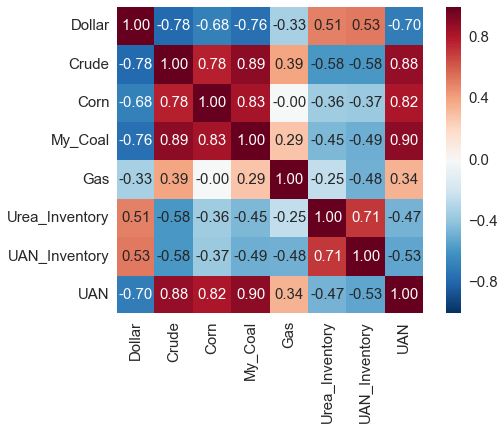

In [9]:
cols= ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

 - dollar corr to crude, corn, coal, both inventories and uan
 - crude corr to dollar, corn, coal, both inventories and uan
 - corn corr to dollar, crude, coal and uan
 - coal corr to dollar, crude, corn and uan
 - gas corr to nothing
 - urea inventory corr to dollar, crude, uan_inventory
 - uan inventory corr to dollar, crude, urea inventory and uan
 - uan corr to dollar, crude, corn, coal, uan inventory

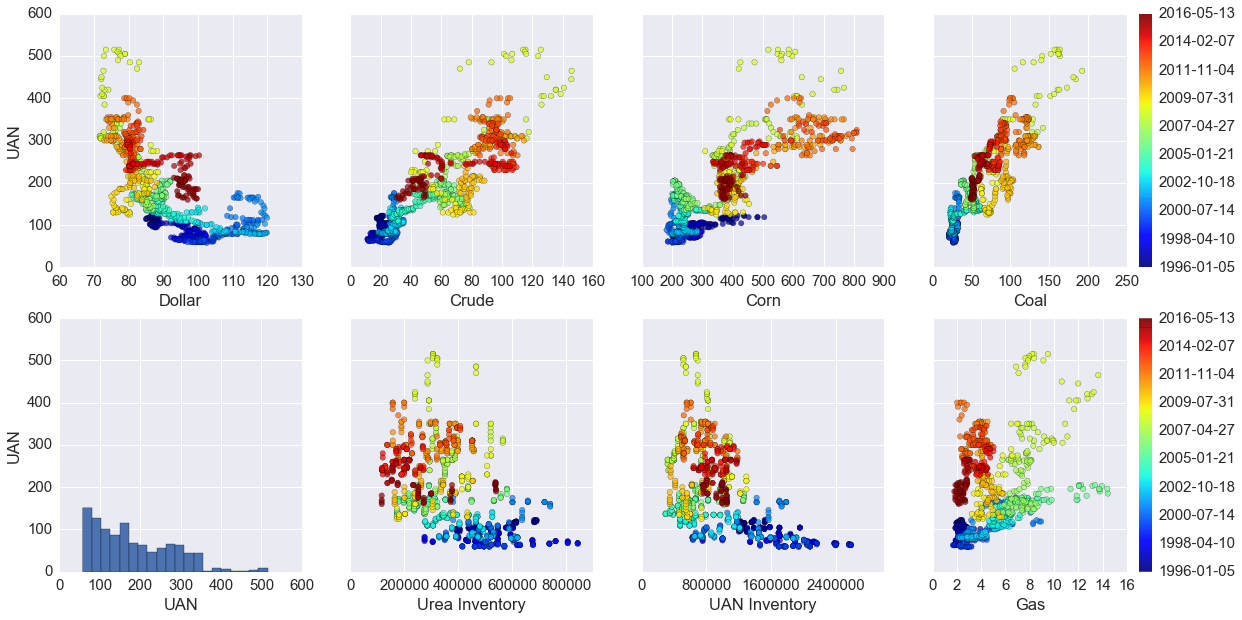

In [10]:
x1 = df_96on['Dollar']
x2 = df_96on['Crude']
x3 = df_96on['Corn']
x4 = df_96on['My_Coal']
x5 = df_96on['Gas']
x6 = df_96on['Urea_Inventory']
x7 = df_96on['UAN_Inventory']
y1 = df_96on['UAN']
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x5 = np.array(x5)
x6 = np.array(x6)
x7 = np.array(x7)
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(x1))
fig, axes = plt.subplots(2,4,sharey=True,figsize=(20,10))

a0 = axes[0][0].scatter(x1,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][0].set_ylabel('UAN')
axes[0][0].set_xlabel('Dollar')
a1 = axes[0][1].scatter(x2,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][1].set_xlabel('Crude')
a2 = axes[0][2].scatter(x3,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][2].set_xlabel('Corn')
a3 = axes[0][3].scatter(x4,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][3].set_xlabel('Coal')
a4 = axes[1][3].scatter(x5,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[1][3].set_xlabel('Gas')
a5 = axes[1][1].scatter(x6,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[1][1].set_xlabel('Urea Inventory')
axes[1][1].xaxis.set_major_locator(MaxNLocator(5))
a6 = axes[1][2].scatter(x7,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[1][2].set_xlabel('UAN Inventory')
axes[1][2].xaxis.set_major_locator(MaxNLocator(4))
a7 = axes[1][0].hist(df_96on['UAN'],bins=20)
axes[1][0].set_xlabel('UAN')
axes[1][0].set_ylabel('UAN')

cbar1 = fig.colorbar(a3,ax=axes[0][3])
cbar2 = fig.colorbar(a4,ax=axes[1][3])

df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.index = df_96on['Date'].values
df_96on = df_96on.drop(['Date'],axis=1)
X = df_96on[['Dollar']]
Y = df_96on[['UAN']]
cbar1.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
cbar2.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
plt.show()

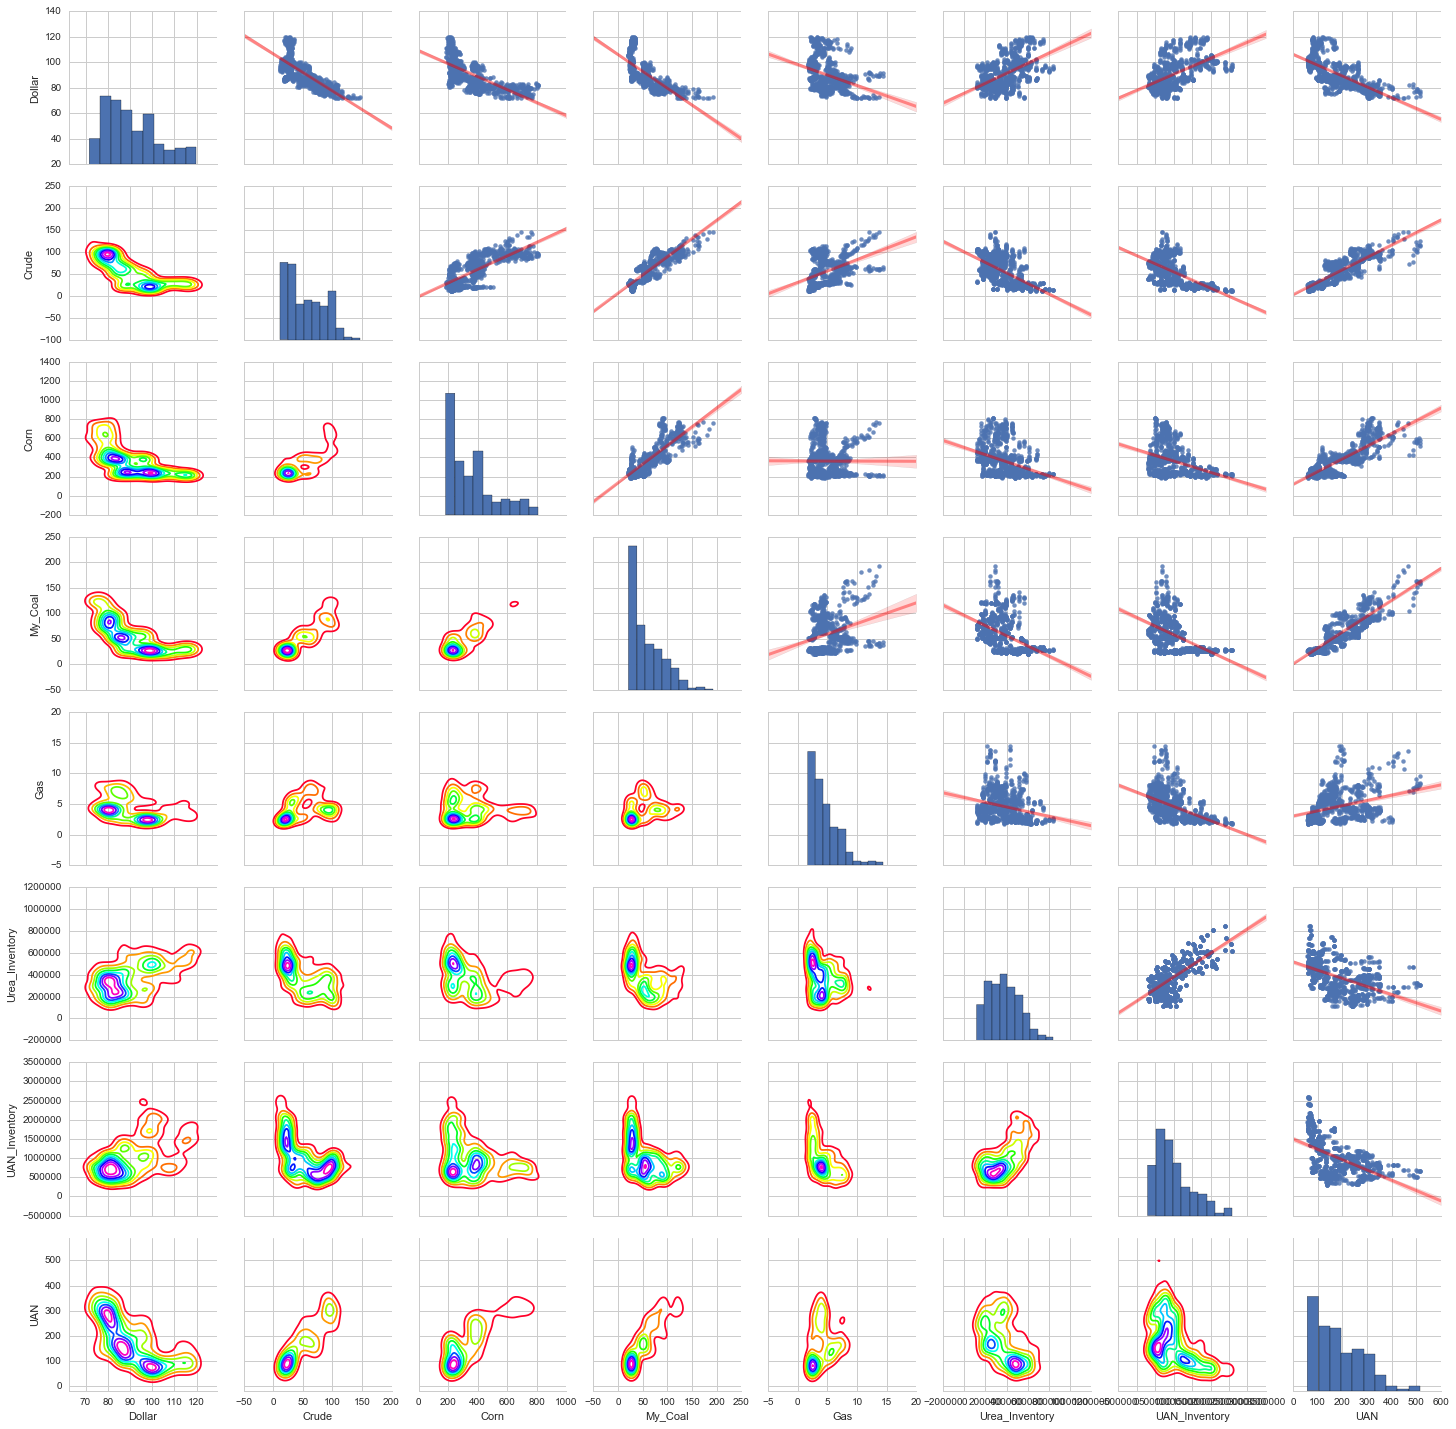

In [11]:
sns.set(style='whitegrid', context='notebook')
corrPlots = sns.PairGrid(df_96on)
corrPlots = corrPlots.map_diag(plt.hist)
corrPlots = corrPlots.map_lower(sns.kdeplot,cmap="gist_rainbow")
corrPlots = corrPlots.map_upper(sns.regplot,line_kws={"color":"r","alpha":0.4,"lw":3}) 

# Choosing Which MLR Models Would be Best
[Top](#table-of-contents)

In [12]:
# mlr model that has all the variables included
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     937.0
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        10:21:34   Log-Likelihood:                -5344.5
No. Observations:                1069   AIC:                         1.070e+04
Df Residuals:                    1061   BIC:                         1.074e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            -95.5629     18.084     -5.284      0.000      -131.048   -60.078
Dollar             0.8577      0.159      5.390      0.000         0.545     1.170
Crude              0.7350      0.100      7.344      0.000         0.539     0.931
Corn               0.2117      0.016     13.378      0.000         0.181     0.243
Gas                6.0950      0.676      9.020      0.000         4.769     7.421
My_Coal            1.1727      0.087     13.431      0.000         1.001     1.344
Urea_Inventory -1.633e-05   1.16e-05     -1.409      0.159     -3.91e-05  6.42e-06
UAN_Inventory  -5.413e-06   3.69e-06     -1.467      0.143     -1.27e-05  1.83e-06
==============================================================================
Omnibus:                      134.255   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.052
Skew:                           0.704   Prob(JB):                     1.42e-69
Kurtosis:                       5.266   Cond. No.                     1.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# RFECV
#order is 'Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory'
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #starts at 2nd so don't include the two inventories

Optimal number of features: 5
[array([False,  True,  True,  True,  True,  True, False, False], dtype=bool)]
[4 1 1 1 1 1 2 3]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#rfecv choice
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1300.
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        10:21:43   Log-Likelihood:                -5349.5
No. Observations:                1069   AIC:                         1.071e+04
Df Residuals:                    1063   BIC:                         1.074e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -102.4899     17.953     -5.709      0.000      -137.716   -67.263
Dollar         0.7654      0.157      4.881      0.000         0.458     1.073
Crude          0.8432      0.091      9.225      0.000         0.664     1.023
Corn           0.2077      0.016     13.391      0.000         0.177     0.238
Gas            6.3035      0.617     10.219      0.000         5.093     7.514
My_Coal        1.1417      0.087     13.144      0.000         0.971     1.312
==============================================================================
Omnibus:                      136.733   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.851
Skew:                           0.723   Prob(JB):                     2.59e-69
Kurtosis:                       5.236   Cond. No.                     6.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Forward Selection
[Click Here to Get Back to Where You Left Off](#Before-Proceeding-Please-Go-To-Forward-Selection-MLR-Model)

In [3]:
#forward selection, must do this before change the datetimes
data = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']]
Y = df_96on[['UAN']]
response = df_96on['UAN'] # need to have in the series format
Y = np.array(Y)

#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model

In [4]:
#results of stepwise regression 
result = forward_aic(Y, data)
result.summary()
#just no urea inventory

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1092.
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        10:16:37   Log-Likelihood:                -5345.5
No. Observations:                1069   AIC:                         1.070e+04
Df Residuals:                    1062   BIC:                         1.074e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -94.9738     18.088     -5.251      0.000      -130.466   -59.482
My_Coal           1.1586      0.087     13.351      0.000         0.988     1.329
Crude             0.7863      0.093      8.429      0.000         0.603     0.969
Corn              0.2069      0.015     13.380      0.000         0.177     0.237
Gas               5.7914      0.641      9.039      0.000         4.534     7.049
Dollar            0.8292      0.158      5.252      0.000         0.519     1.139
UAN_Inventory -8.475e-06   2.98e-06     -2.840      0.005     -1.43e-05 -2.62e-06
==============================================================================
Omnibus:                      130.081   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.204
Skew:                           0.692   Prob(JB):                     6.48e-66
Kurtosis:                       5.197   Cond. No.                     1.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Put Into Test and Training Sets for More Accuracy
[Top](#table-of-contents)

In [109]:
#all variables
featured_cols_all = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']
X6 = df_96on[featured_cols_all]
y6 = df_96on['UAN']
trainX6, testX6, trainY6, testY6 = train_test_split(X6,y6,test_size=0.3)
lm6 = LinearRegression()
lm6.fit(trainX6,trainY6)
zip(featured_cols_all,lm6.coef_)
print(lm6.intercept_)
print(lm6.coef_)
print(lm6.score(trainX6,trainY6))

-102.563138381
[  9.51723977e-01   6.14615832e-01   2.13943161e-01   1.29379698e+00
   6.37998755e+00  -3.27838861e-05  -3.67560982e-06]
0.862319228967


In [110]:
#rfecv
featured_cols_rfecv = ['Dollar','Crude','Corn','My_Coal','Gas']
X7 = df_96on[featured_cols_rfecv]
y7 = df_96on['UAN']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_rfecv,lm7.coef_)
print(lm7.intercept_)
print(lm7.coef_)
print(lm7.score(trainX7,trainY7))

-76.7648031206
[ 0.52769207  0.81303575  0.19771177  1.11958213  6.72291424]
0.863473721022


In [144]:
#forward selection
featured_cols_forward = ['Dollar','Crude','Corn','My_Coal','Gas','UAN_Inventory']
X8 = df_96on[featured_cols_forward]
y8 = df_96on['UAN']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_forward,lm8.coef_)
print(lm8.intercept_)
print(lm8.coef_)
print(lm8.score(trainX8,trainY8))

-96.8224698459
[  8.07749601e-01   8.34350043e-01   2.05648264e-01   1.14002719e+00
   6.02992589e+00  -6.78172560e-06]
0.864870913069


In [18]:
lm6.predict(testX6)

array([ 202.39904087,  196.18404194,  176.18952892,  219.30868349,
        177.5705008 ,   99.74811138,  102.85385516,  133.55457835,
         92.15494199,  114.34993299,  121.07047268,  185.7765801 ,
        214.41962022,   68.69281204,  318.22307592,  178.00510397,
         89.79960482,   95.01392974,  210.07585342,   93.09260562,
        242.99182314,  118.35256822,  321.89955327,   88.940448  ,
        102.75631774,  355.37338498,  153.00565656,  105.11749332,
         91.76621568,  110.10169001,  269.47529722,  256.90988138,
        107.66154699,   95.68436922,  186.8088897 ,  119.04509133,
        106.64593003,  102.57244167,  314.00412428,   82.6879646 ,
        216.83056029,  303.37236701,  260.81878784,  236.14261957,
        301.57310265,  107.64013899,  216.8706931 ,  216.41833139,
        221.7251536 ,  318.61984292,  241.257382  ,  141.05347413,
         94.96163428,  251.37812403,  266.5938941 ,  226.84190622,
        112.60337697,  177.16458431,  176.45909365,  206.88805

# RDF Analysis
[Top](#table-of-contents)

In [20]:
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on uan data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [23]:
#do multiple times to see what parameters are the best
rdf_model_uanall = fit_predict_model(X_train,y_train)
print (rdf_model_uanall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


### Model 1 = All Variables Used

In [35]:
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
forest1.feature_importances_

MSE train: 47.675, test: 312.744
R^2 train: 0.995, test: 0.967


array([ 0.016855  ,  0.18638302,  0.11139645,  0.62312386,  0.03266099,
        0.01005821,  0.01952248])

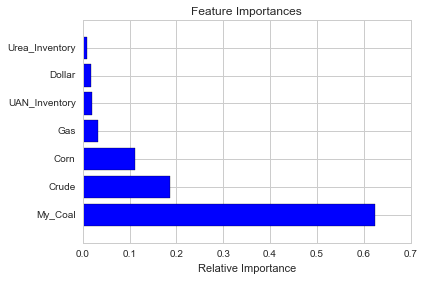

In [49]:
features = df_96on.columns[0:7]
importances = forest1.feature_importances_
indices = np.argsort(importances)
#this is saying put the variable of most importance first, descending from there
indices= np.argsort(importances)[::-1]
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

### Model 2 = Top 3 crude, corn, coal

In [32]:
#top 3
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_uantop3 = fit_predict_model(X_train,y_train)
print (rdf_model_uantop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [50]:
X2 = df_96on[['Crude','Corn','My_Coal']].values
y2 = df_96on['UAN'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 138.923, test: 698.434
R^2 train: 0.985, test: 0.926
[ 0.26819834  0.11928846  0.6125132 ]


### Model 3 = Top 4 crude, corn, coal, gas

In [54]:
#top 4
X = df_96on[['Crude','Corn','My_Coal','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_uantop4 = fit_predict_model(X_train,y_train)
print (rdf_model_uantop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [55]:
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 85.395, test: 398.998
R^2 train: 0.991, test: 0.958
[ 0.22829113  0.12139207  0.60681324  0.04350355]


### Model 4 = no crude since highly correlated to coal to I will use coal

In [59]:
# no crude
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_uannocrude = fit_predict_model(X_train,y_train)
print (rdf_model_uannocrude.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [60]:
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 58.278, test: 353.521
R^2 train: 0.994, test: 0.963
[ 0.15837582  0.76251366  0.04479261  0.03431791]


### Model 5 = x variables not correlated to each other, coal, gas, uan inventory

In [63]:
# no multicollinearity
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_uannocorr = fit_predict_model(X_train,y_train)
print (rdf_model_uannocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [64]:
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 71.263, test: 388.928
R^2 train: 0.992, test: 0.959
[ 0.87616274  0.06786612  0.05597114]


# Average Case
[Top](#table-of-contents)

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [159]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneavg.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][0:1069]
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1067,6/17/2016,94.21,48.56,442.75,52.55,2.67,494921,1048312,169.92
1068,6/24/2016,95.45,48.31,389.00,52.90,2.69,494921,1048312,165.12


In [160]:
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory             int64
UAN_Inventory              int64
UAN                      float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1.069000e+03,1069.000000
mean,90.701207,54.744191,362.061272,58.229429,4.584453,380550.317119,1.005712e+06,183.682245
std,11.671219,31.145360,156.191066,33.461287,2.363018,151827.487495,4.891735e+05,96.238083
min,71.660000,11.260000,182.500000,20.900000,1.660000,115939.000000,2.977010e+05,58.000000
25%,81.230000,26.520000,231.500000,27.430000,2.740000,259565.000000,6.506020e+05,101.520000
50%,87.950000,49.120000,327.750000,51.850000,4.020000,369767.000000,8.625000e+05,165.200000
75%,98.680000,81.920000,424.500000,78.600000,5.810000,480612.000000,1.233929e+06,255.040000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2.588393e+06,514.880000


## MLR Models Avg
[Top](#table-of-contents)

In [161]:
#mlr 1
featured_cols_all = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']
X6 = df_96on[featured_cols_all]
y6 = df_96on['UAN']
trainX6, testX6, trainY6, testY6 = train_test_split(X6,y6,test_size=0.3)
lm6 = LinearRegression()
lm6.fit(trainX6,trainY6)
zip(featured_cols_all,lm6.coef_)

In [162]:
# mlr2
featured_cols_rfecv = ['Dollar','Crude','Corn','My_Coal','Gas']
X7 = df_96on[featured_cols_rfecv]
y7 = df_96on['UAN']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_rfecv,lm7.coef_)

In [163]:
#mlr3
featured_cols_forward = ['Dollar','Crude','Corn','My_Coal','Gas','UAN_Inventory']
X8 = df_96on[featured_cols_forward]
y8 = df_96on['UAN']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_forward,lm8.coef_)

## RDF Models
[Top](#table-of-contents)

In [164]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 42.467, test: 304.803
R^2 train: 0.995, test: 0.968
[ 0.01690816  0.20706288  0.1141346   0.60043088  0.03241772  0.01039048
  0.01865529]


In [165]:
#model 2
X2 = df_96on[['Crude','Corn','My_Coal']].values
y2 = df_96on['UAN'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 130.907, test: 694.530
R^2 train: 0.986, test: 0.926
[ 0.25455663  0.12305066  0.62239271]


In [166]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 86.371, test: 369.529
R^2 train: 0.991, test: 0.961
[ 0.26967374  0.11513566  0.57056727  0.04462334]


In [167]:
# model 4
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 56.459, test: 377.447
R^2 train: 0.994, test: 0.960
[ 0.14858699  0.77170295  0.0456596   0.03405047]


In [168]:
#model 5
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 71.454, test: 393.720
R^2 train: 0.992, test: 0.958
[ 0.87853498  0.06629585  0.05516917]


In [169]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
mlr1 = lm6.predict(X6)
mlr2 = lm7.predict(X7)
mlr3 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
mlr3 = pd.DataFrame(mlr3)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['MLR3'] = mlr3
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Model5
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,97.456290,99.905290,101.090019,114.202122,111.623059,114.048737,113.507977,106.997583
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,94.232878,96.410978,97.664637,113.270960,107.326893,112.000168,110.416566,107.269260
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,98.886267,100.507844,101.426516,113.011030,106.344961,111.716432,110.280326,97.171779


### Predictions Part
[Top](#table-of-contents)

In [170]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','Corn','My_Coal']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1069:1304] #goes with model 3
newpred4 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1069:1304] #goes with model 4
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1069:1304]  #goes with model 5
newpred6 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304]
newpred7 = data[['Dollar','Crude','Corn','My_Coal','Gas']][1069:1304]#goes with mlr2
newpred8 = data[['Dollar','Crude','Corn','My_Coal','Gas','UAN_Inventory']][1069:1304]#goes with mlr3
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,527220,1186900
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,527220,1186900
1071,7/15/2016,96.13,48.28,382.31,53.12,2.66,527220,1186900


In [171]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory'] #all variables used except uan
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900
2,2016-07-15,96.13,48.28,382.31,53.12,2.66,527220,1186900
3,2016-07-22,95.6,46.81,380.9,53.07,2.51,527220,1186900
4,2016-07-29,95.77,47.54,381.38,53.08,2.64,527220,1186900
5,2016-08-05,96.63,46.59,387.16,52.96,2.56,508649,1250760
6,2016-08-12,96.9,47.22,385.1,53.04,2.59,508649,1250760
7,2016-08-19,96.04,48.11,381.27,53.02,2.55,508649,1250760
8,2016-08-26,95.77,47.51,379.14,53.1,2.55,508649,1250760
9,2016-09-02,96.61,47.38,382.68,53.03,2.62,369948,1258240


In [172]:
#model 1, 2, 3, 4 & 5 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = lm6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['MLR1'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR2'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR3'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1,Model2,Model3,Model4,Model5,MLR1,MLR2,MLR3
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900,218.375267,223.166167,225.784691,226.685725,242.085317,172.138302,173.539097,172.082991
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900,212.761646,205.297574,199.985681,211.957943,243.970822,169.331221,169.962440,168.328865


In [173]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Model5,My_Coal,UAN,UAN_Inventory,Urea_Inventory
233,421.59,62.99,2020-12-18,90.81,3.29,197.097481,197.199519,197.641618,217.707573,227.898455,223.073920,228.493542,220.073145,59.1,NaN,1000000,400000
234,465.75,67.68,2020-12-25,90.8,3.45,210.933892,211.519765,212.000345,232.205154,215.862165,218.303222,231.791520,217.386614,59.15,NaN,1000000,400000


In [174]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model2','Model3','Model4','Model5','MLR1','MLR2','MLR3']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model2','Model3','Model4','Model5','MLR1','MLR2','MLR3']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model2,Model3,Model4,Model5,MLR1,MLR2,MLR3
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,114.202,111.623,114.049,113.508,106.998,97.4563,99.9053,101.09
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,113.271,107.327,112,110.417,107.269,94.2329,96.411,97.6646
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,113.011,106.345,111.716,110.28,97.1718,98.8863,100.508,101.427
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,112.865,93.2935,111.514,110.28,96.7499,98.1763,99.5403,100.396
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,116.78,104.365,115.947,116.298,113.416,103.033,105.138,104.792
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,115.455,101.561,111.792,111.605,115.421,98.9863,101.456,101.442
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,117.09,112.854,117.173,117.288,110.067,101.118,103.822,103.96
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,117.021,112.513,117.151,117.21,115.408,102.151,104.882,104.896
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,117.053,115.716,117.268,117.177,109.23,99.1938,104.34,103.181
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,116.819,114.026,116.748,115.611,108.476,98.3858,103.631,102.645


In [175]:
combined.to_csv("C:/Users/msteinme/Documents/UANjuneavgresults.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


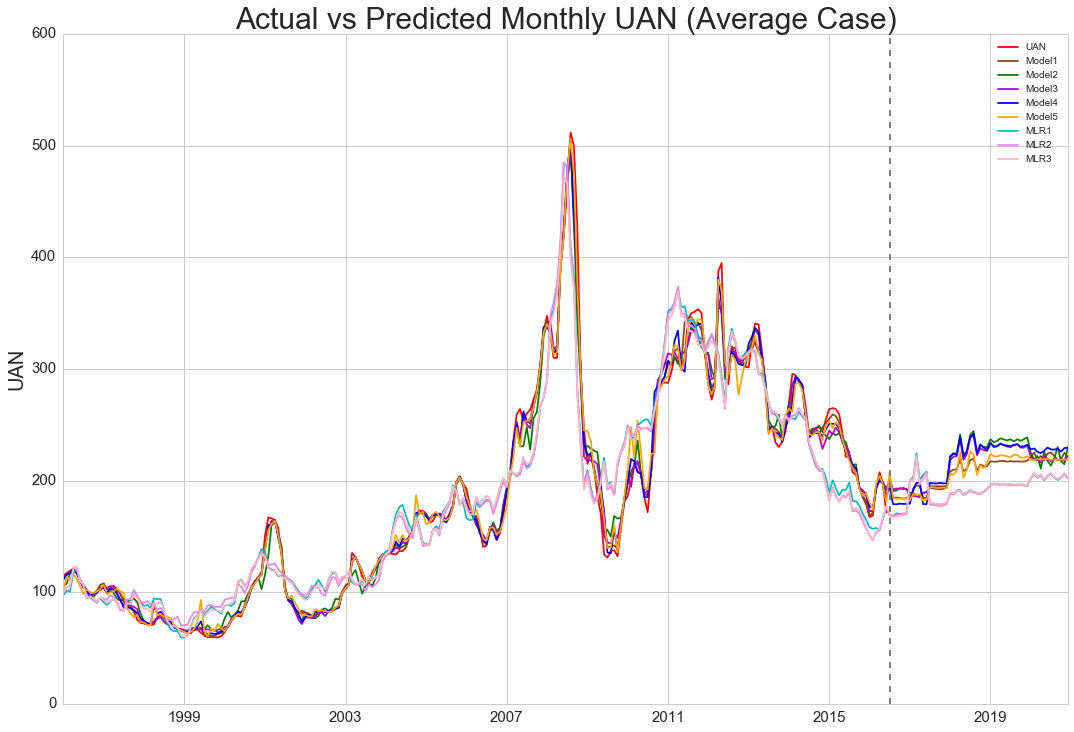

In [176]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['UAN'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['MLR1'])
y8 = (combined['MLR2'])
y9 = (combined['MLR3'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Average Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN',size=(20))
plt.show()

# Best Case
[Top](#table-of-contents)

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [178]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjunebest.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][0:1069]
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1067,6/17/2016,94.21,48.56,442.75,52.55,2.67,371191,1048312,169.92
1068,6/24/2016,95.45,48.31,389.00,52.90,2.69,371191,1048312,165.12


In [179]:
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory             int64
UAN_Inventory              int64
UAN                      float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1.069000e+03,1069.000000
mean,90.701207,54.744191,362.061272,58.229429,4.584453,380087.342376,1.005712e+06,183.682245
std,11.671219,31.145360,156.191066,33.461287,2.363018,151666.437554,4.891735e+05,96.238083
min,71.660000,11.260000,182.500000,20.900000,1.660000,115939.000000,2.977010e+05,58.000000
25%,81.230000,26.520000,231.500000,27.430000,2.740000,259565.000000,6.506020e+05,101.520000
50%,87.950000,49.120000,327.750000,51.850000,4.020000,369767.000000,8.625000e+05,165.200000
75%,98.680000,81.920000,424.500000,78.600000,5.810000,479692.000000,1.233929e+06,255.040000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2.588393e+06,514.880000


## MLR Models Best
[Top](#table-of-contents)

In [180]:
#mlr 1
featured_cols_all = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']
X6 = df_96on[featured_cols_all]
y6 = df_96on['UAN']
trainX6, testX6, trainY6, testY6 = train_test_split(X6,y6,test_size=0.3)
lm6 = LinearRegression()
lm6.fit(trainX6,trainY6)
zip(featured_cols_all,lm6.coef_)

In [181]:
# mlr2
featured_cols_rfecv = ['Dollar','Crude','Corn','My_Coal','Gas']
X7 = df_96on[featured_cols_rfecv]
y7 = df_96on['UAN']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_rfecv,lm7.coef_)

In [182]:
#mlr3
featured_cols_forward = ['Dollar','Crude','Corn','My_Coal','Gas','UAN_Inventory']
X8 = df_96on[featured_cols_forward]
y8 = df_96on['UAN']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_forward,lm8.coef_)

## RDF Models Best
[Top](#table-of-contents)

In [183]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 43.338, test: 319.393
R^2 train: 0.995, test: 0.966
[ 0.01671976  0.19986363  0.11437059  0.6072931   0.03178454  0.0107216
  0.01924678]


In [184]:
#model 2
X2 = df_96on[['Crude','Corn','My_Coal']].values
y2 = df_96on['UAN'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 135.232, test: 677.161
R^2 train: 0.985, test: 0.928
[ 0.26343672  0.12870023  0.60786305]


In [185]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 83.507, test: 386.356
R^2 train: 0.991, test: 0.959
[ 0.23013788  0.12088042  0.60414348  0.04483822]


In [186]:
# model 4
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 57.311, test: 365.761
R^2 train: 0.994, test: 0.961
[ 0.14902983  0.77138573  0.04596878  0.03361566]


In [187]:
#model 5
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 73.819, test: 392.019
R^2 train: 0.992, test: 0.958
[ 0.87825541  0.06604052  0.05570407]


In [188]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
mlr1 = lm6.predict(X6)
mlr2 = lm7.predict(X7)
mlr3 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
mlr3 = pd.DataFrame(mlr3)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['MLR3'] = mlr3
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Model5
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,97.794341,102.049709,99.824718,114.260328,110.915233,114.070910,114.096135,107.961683
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,94.699948,98.443468,96.623210,112.811970,107.415714,111.700709,110.624628,108.526142
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,99.662900,101.872890,101.275464,111.983576,108.007028,112.160000,110.462969,100.579921


### Predictions Part Best
[Top](#table-of-contents)

In [189]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','Corn','My_Coal']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1069:1304] #goes with model 3
newpred4 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1069:1304] #goes with model 4
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1069:1304]  #goes with model 5
newpred6 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304]
newpred7 = data[['Dollar','Crude','Corn','My_Coal','Gas']][1069:1304]#goes with mlr2
newpred8 = data[['Dollar','Crude','Corn','My_Coal','Gas','UAN_Inventory']][1069:1304]#goes with mlr3
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,395415,1186900
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,395415,1186900
1071,7/15/2016,94.06,48.48,402.54,53.79,2.76,395415,1186900


In [190]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory'] #all variables used except uan
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900
2,2016-07-15,94.06,48.48,402.54,53.79,2.76,395415,1186900
3,2016-07-22,92.51,48.64,396.62,54.73,2.72,395415,1186900
4,2016-07-29,93.53,49.1,389.17,54.06,2.81,395415,1186900
5,2016-08-05,93.57,48.8,405.67,55.42,2.87,381487,1250760
6,2016-08-12,93.25,48.78,398.79,55.27,2.71,381487,1250760
7,2016-08-19,93.99,49.36,409.9,55.43,2.89,381487,1250760
8,2016-08-26,94.8,48.94,405.38,53.21,2.77,381487,1250760
9,2016-09-02,94.05,50.85,409.87,54.67,2.79,277461,1258240


In [191]:
#model 1, 2, 3, 4 & 5 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = lm6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['MLR1'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR2'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR3'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1,Model2,Model3,Model4,Model5,MLR1,MLR2,MLR3
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900,217.777765,222.314631,225.353805,227.818332,240.884667,174.391320,171.247994,173.613650
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900,203.025218,204.422521,206.223944,216.928867,244.343428,171.680293,167.492383,170.823822


In [192]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Model5,My_Coal,UAN,UAN_Inventory,Urea_Inventory
233,420,83.02,2020-12-18,87.13,3.9,223.289822,222.104898,222.457360,235.293386,248.810061,239.010290,240.782451,237.855578,67,NaN,900000,300000
234,420,88,2020-12-25,86.9,3.86,226.837561,225.957870,225.690051,236.873743,251.270898,243.266554,240.776966,237.840645,67,NaN,900000,300000


In [193]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model2','Model3','Model4','Model5','MLR1','MLR2','MLR3']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model2','Model3','Model4','Model5','MLR1','MLR2','MLR3']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model2,Model3,Model4,Model5,MLR1,MLR2,MLR3
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,114.26,110.915,114.071,114.096,107.962,97.7943,102.05,99.8247
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,112.812,107.416,111.701,110.625,108.526,94.6999,98.4435,96.6232
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,111.984,108.007,112.16,110.463,100.58,99.6629,101.873,101.275
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,111.815,94.8143,112.053,110.463,100.37,98.9655,100.788,100.49
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,117.019,107.05,116.617,116.743,112.686,103.853,106.466,105.589
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,114.898,104.67,112.247,111.79,114.454,99.5463,103.126,101.406
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,117.174,112.282,116.852,117.322,108.232,101.34,105.691,103.597
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,117.139,112.092,116.788,117.221,114.453,102.421,106.832,104.702
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,117.599,113.71,116.838,117.52,108.033,100.235,106.118,102.49
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,117.408,112.853,116.356,116.372,105.082,99.2309,105.469,101.589


In [194]:
combined.to_csv("C:/Users/msteinme/Documents/UANjunebestresults.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


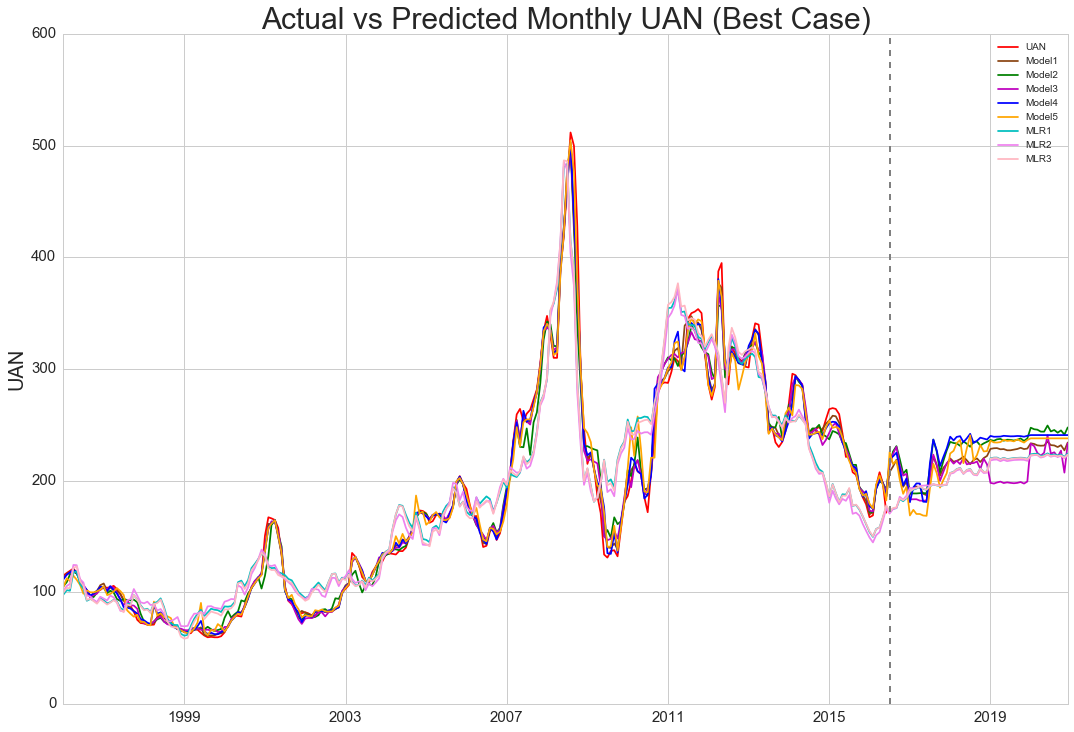

In [195]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['UAN'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['MLR1'])
y8 = (combined['MLR2'])
y9 = (combined['MLR3'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN',size=(20))
plt.show()

# Worst Case
[Top](#table-of-contents)

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [197]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneworst.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][0:1069]
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1067,6/17/2016,94.21,48.56,442.75,52.55,2.67,618651,1048312,169.92
1068,6/24/2016,95.45,48.31,389.00,52.90,2.69,618651,1048312,165.12


In [198]:
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory             int64
UAN_Inventory              int64
UAN                      float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1.069000e+03,1069.000000
mean,90.701207,54.744191,362.061272,58.229429,4.584453,381013.291862,1.005712e+06,183.682245
std,11.671219,31.145360,156.191066,33.461287,2.363018,152363.740922,4.891735e+05,96.238083
min,71.660000,11.260000,182.500000,20.900000,1.660000,115939.000000,2.977010e+05,58.000000
25%,81.230000,26.520000,231.500000,27.430000,2.740000,259565.000000,6.506020e+05,101.520000
50%,87.950000,49.120000,327.750000,51.850000,4.020000,369767.000000,8.625000e+05,165.200000
75%,98.680000,81.920000,424.500000,78.600000,5.810000,480612.000000,1.233929e+06,255.040000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2.588393e+06,514.880000


## MLR Models Worst
[Top](#table-of-contents)

In [199]:
#mlr 1
featured_cols_all = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']
X6 = df_96on[featured_cols_all]
y6 = df_96on['UAN']
trainX6, testX6, trainY6, testY6 = train_test_split(X6,y6,test_size=0.3)
lm6 = LinearRegression()
lm6.fit(trainX6,trainY6)
zip(featured_cols_all,lm6.coef_)

In [200]:
# mlr2
featured_cols_rfecv = ['Dollar','Crude','Corn','My_Coal','Gas']
X7 = df_96on[featured_cols_rfecv]
y7 = df_96on['UAN']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_rfecv,lm7.coef_)

In [201]:
#mlr3
featured_cols_forward = ['Dollar','Crude','Corn','My_Coal','Gas','UAN_Inventory']
X8 = df_96on[featured_cols_forward]
y8 = df_96on['UAN']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_forward,lm8.coef_)

## RDF Models Worst
[Top](#table-of-contents)

In [202]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y1 = df_96on['UAN'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 43.430, test: 284.164
R^2 train: 0.995, test: 0.970
[ 0.01595552  0.19991139  0.10979745  0.61142967  0.03282372  0.01050039
  0.01958187]


In [203]:
#model 2
X2 = df_96on[['Crude','Corn','My_Coal']].values
y2 = df_96on['UAN'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 133.653, test: 719.001
R^2 train: 0.985, test: 0.924
[ 0.22357549  0.1382967   0.63812781]


In [204]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','Gas']].values
y3 = df_96on['UAN'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 83.021, test: 387.243
R^2 train: 0.991, test: 0.959
[ 0.19373584  0.12954346  0.63152123  0.04519948]


In [205]:
# model 4
X4 = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y4 = df_96on['UAN'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 60.040, test: 365.204
R^2 train: 0.993, test: 0.961
[ 0.1568818   0.76445588  0.04474707  0.03391526]


In [206]:
#model 5
X5 = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y5 = df_96on['UAN'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 67.349, test: 379.634
R^2 train: 0.993, test: 0.960
[ 0.87509895  0.06839267  0.05650838]


In [207]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
mlr1 = lm6.predict(X6)
mlr2 = lm7.predict(X7)
mlr3 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
mlr3 = pd.DataFrame(mlr3)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['MLR3'] = mlr3
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Model5
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,96.704255,103.246903,97.597915,114.988680,111.964959,114.165587,113.886606,107.886724
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,93.540408,99.700589,94.436214,113.577914,106.451752,110.871426,110.262060,107.512054
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,98.270463,103.163751,99.109846,112.913886,105.752997,111.471111,110.122378,96.550804


### Predictions Part Worst
[Top](#table-of-contents)

In [208]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','Corn','My_Coal']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1069:1304] #goes with model 3
newpred4 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1069:1304] #goes with model 4
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1069:1304]  #goes with model 5
newpred6 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']][1069:1304]
newpred7 = data[['Dollar','Crude','Corn','My_Coal','Gas']][1069:1304]#goes with mlr2
newpred8 = data[['Dollar','Crude','Corn','My_Coal','Gas','UAN_Inventory']][1069:1304]#goes with mlr3
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,659025,1186900
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,659025,1186900
1071,7/15/2016,98.65,45.51,376.97,52.74,2.50,659025,1186900


In [209]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory'] #all variables used except uan
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900
2,2016-07-15,98.65,45.51,376.97,52.74,2.5,659025,1186900
3,2016-07-22,96.01,46.24,345.11,52.65,2.31,659025,1186900
4,2016-07-29,97.95,46.63,355.82,52.85,2.67,659025,1186900
5,2016-08-05,99.41,43.36,370.12,51.94,2.38,635811,1250760
6,2016-08-12,96.62,41.82,362.94,52.59,2.47,635811,1250760
7,2016-08-19,98.64,40.33,362.27,52.81,2.31,635811,1250760
8,2016-08-26,98.32,46.34,362.38,52.68,2.69,635811,1250760
9,2016-09-02,98.1,46.91,380.22,51.93,2.6,462435,1258240


In [210]:
#model 1, 2, 3, 4 & 5 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = lm6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['MLR1'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR2'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR3'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,Model1,Model2,Model3,Model4,Model5,MLR1,MLR2,MLR3
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900,217.617821,222.371423,225.639818,223.804819,244.501870,169.144052,172.379663,172.238838
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900,206.683784,197.601562,204.486833,213.892123,244.378836,166.670500,168.632726,169.510587


In [211]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Model5,My_Coal,UAN,UAN_Inventory,Urea_Inventory
233,400.2,49.9,2020-12-18,99.25,2.92,172.934098,175.487822,173.236989,188.007475,197.642578,195.067746,180.598864,181.435622,50.91,NaN,1200000,500000
234,403,53.9,2020-12-25,95.6,2.99,173.845233,178.055169,174.674959,189.219043,194.153595,193.495885,180.092883,173.491317,51.3,NaN,1200000,500000


In [212]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model2','Model3','Model4','Model5','MLR1','MLR2','MLR3']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Model1','Model2','Model3','Model4','Model5','MLR1','MLR2','MLR3']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model2,Model3,Model4,Model5,MLR1,MLR2,MLR3
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,114.989,111.965,114.166,113.887,107.887,96.7043,103.247,97.5979
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,113.578,106.452,110.871,110.262,107.512,93.5404,99.7006,94.4362
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,112.914,105.753,111.471,110.122,96.5508,98.2705,103.164,99.1098
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,112.727,94.098,111.094,110.042,96.0804,97.6184,102.026,98.3853
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,117.07,106.407,115.831,116.59,111.932,103.104,107.71,103.53
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,115.524,102.4,111.196,111.086,114.996,98.8252,104.285,99.3511
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,116.966,113.871,117.365,117.364,108.557,100.688,106.896,101.205
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,116.984,113.452,117.209,117.485,114.977,101.888,108.047,102.35
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,117.195,115.002,117.34,117.623,109.601,99.2423,107.305,100.228
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,116.963,114.472,116.491,115.274,106.042,98.2037,106.615,99.2281


In [213]:
combined.to_csv("C:/Users/msteinme/Documents/UANjuneworstresults.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


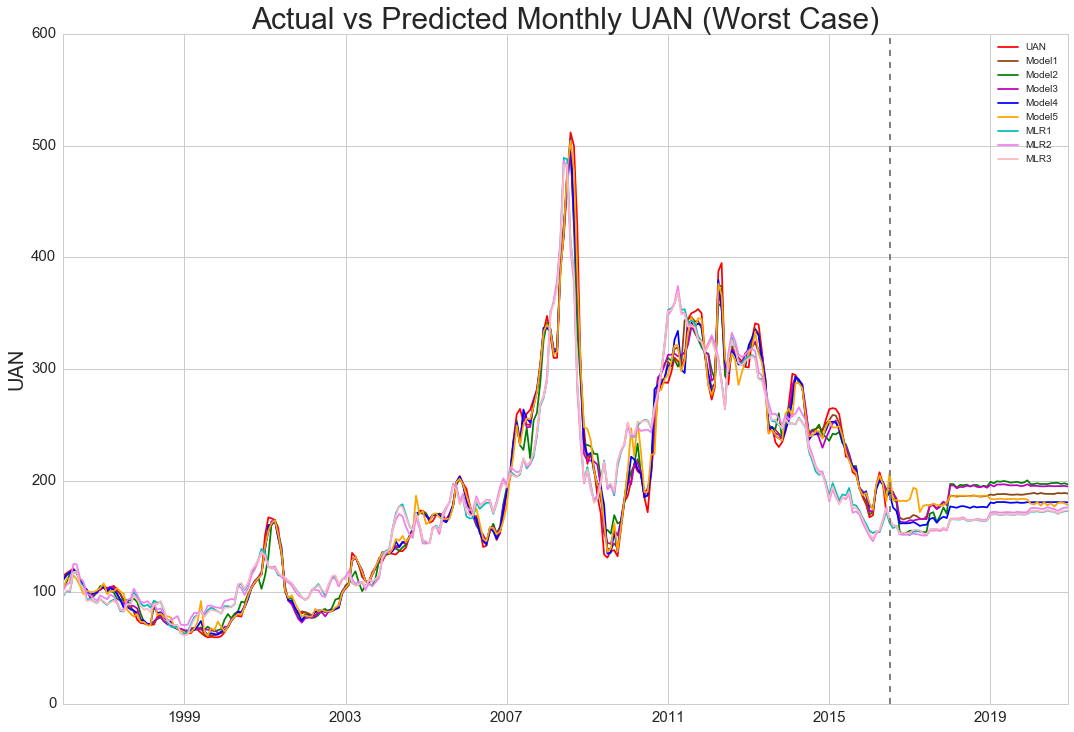

In [214]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['UAN'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['MLR1'])
y8 = (combined['MLR2'])
y9 = (combined['MLR3'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN',size=(20))
plt.show()